In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image

### 분석 목표   
### 카드사 고객의 이탈 여부 예측: 이탈과 관련있는 변수 파악

## 데이터 업로드

In [156]:
df = pd.read_csv('C:/Users/KimDongyoung/Desktop/my_git/mygit/DAT/24-2/개인과제/data/BankChurners.csv')

In [157]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [158]:
# 결측치 확인
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

데이터에 결측치는 없다

In [159]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

컬럼 명   
'CLIENTNUM': 고객ID, 'Attrition_Flag': 이탈여부, 'Customer_Age': 고객나이, 'Gender': 고객성별,       
'Dependent_count': , 'Education_Level': 교육수준, 'Marital_Status': 고객의 결혼여부,    
'Income_Category': 고객 소득수준, 'Card_Category': 고객 카드등급, 'Months_on_book',
'Total_Relationship_Count', 'Months_Inactive_12_mon',
'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

In [160]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

총 23개의 변수가 존재하며 이 중 Attrition_Flag 컬럼에서 고객의 이탈 여부를 확인할 수 있기 때문에 예측해야 하는 종속 변수이다.   
target_variable = Attrition_Flag 

In [161]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


23개의 컬럼 중에서 17개가 숫자로 이루어진 변수이고 나머지 데이터 타입은 문자열 데이터이다.

## EDA

<Axes: xlabel='Customer_Age', ylabel='Count'>

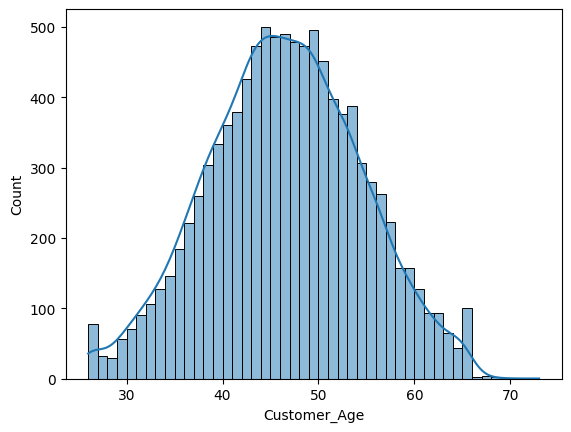

In [162]:
# 고객의 나이 분포 확인
sns.histplot(df['Customer_Age'], kde=True)

나이는 정규 분포의 형태를 띄는 것을 알 수 있다.

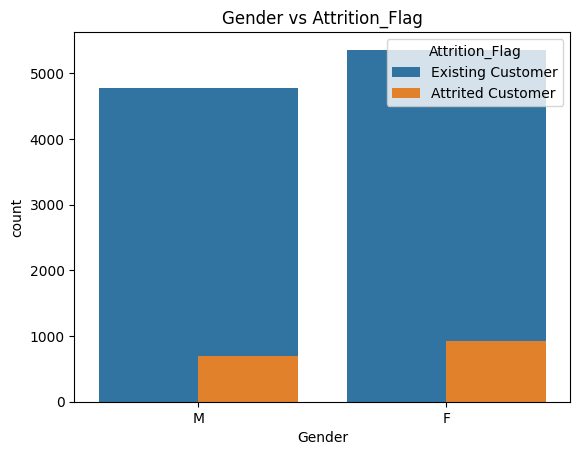

Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                             930               4428
M                             697               4072
Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                        0.173572           0.826428
M                        0.146152           0.853848


In [163]:
# 고객의 성별 분포 확인

sns.countplot(x='Gender', data=df)

sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.title('Gender vs Attrition_Flag')
plt.show()

# 성별에 따른 이탈 여부를 표로 나타내기
gender_churn_table = df.groupby(['Gender', 'Attrition_Flag']).size().unstack(fill_value=0)
print(gender_churn_table)
# 성별에 따른 이탈 여부 비율을 표로 나타내기
gender_churn_ratio = gender_churn_table.div(gender_churn_table.sum(axis=1), axis=0)
print(gender_churn_ratio)

여성이 근소하게 더 많으나 큰 차이가 나지 않는다.

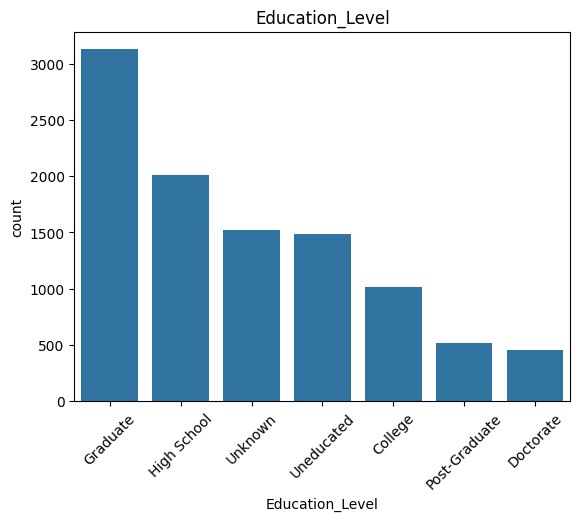

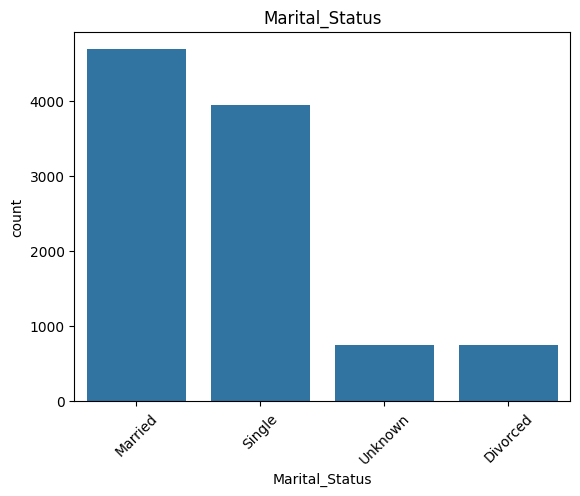

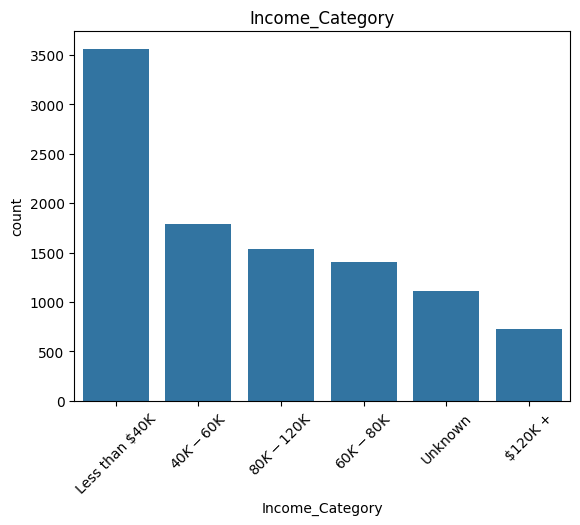

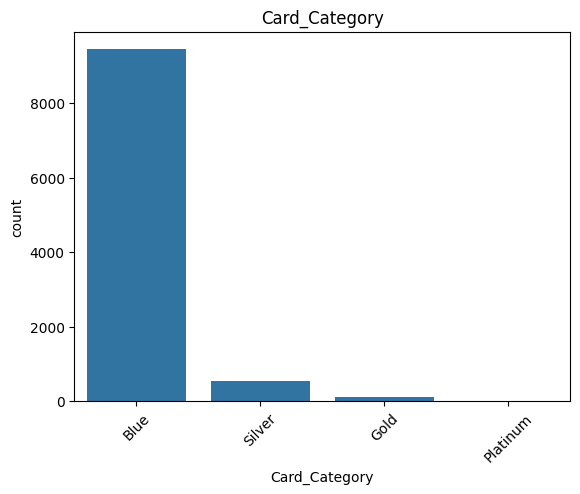

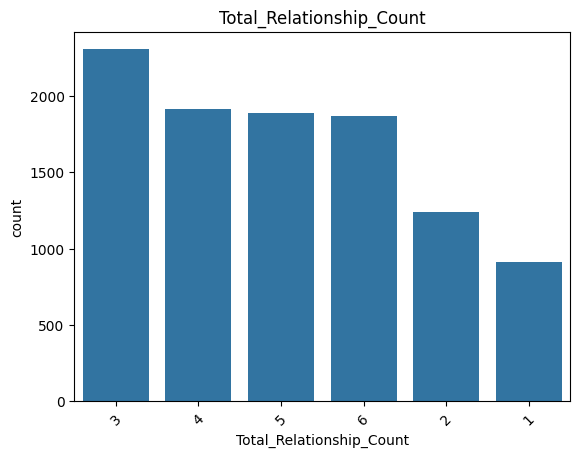

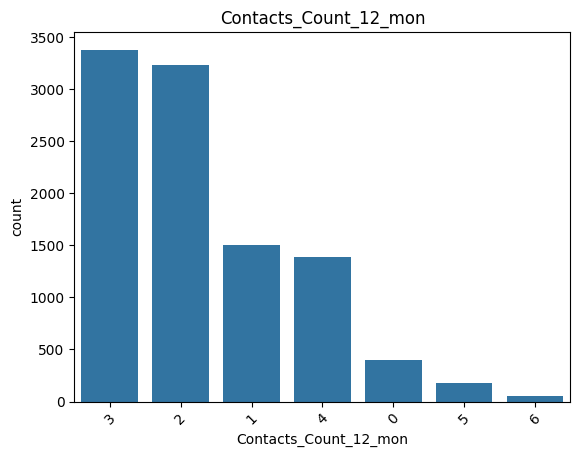

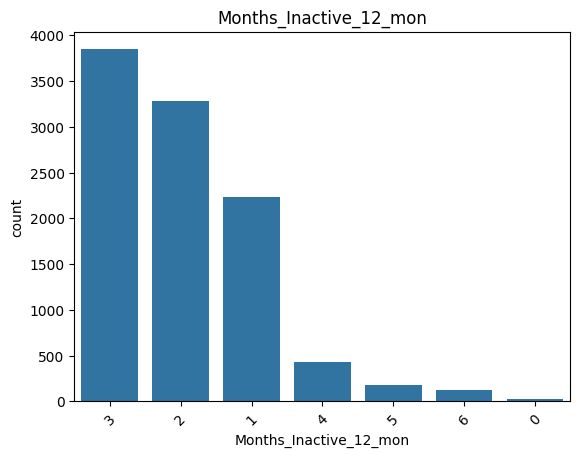

In [164]:
# 반복문을 활용해서 Education_Level, Marital_Status, Income_Category, Card_Category의 분포 확인

columns = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Total_Relationship_Count', 'Contacts_Count_12_mon','Months_Inactive_12_mon',]

for column in columns:
    # 내림차순으로 정렬된 데이터프레임 생성
    sorted_df = df[column].value_counts(ascending=False).reset_index()
    sorted_df.columns = [column, 'count']
    
    # 내림차순으로 정렬된 데이터프레임을 사용하여 countplot 생성
    sns.countplot(x=column, data=df, order=sorted_df[column])
    plt.xticks(rotation=45)
    plt.title(column)
    plt.show()

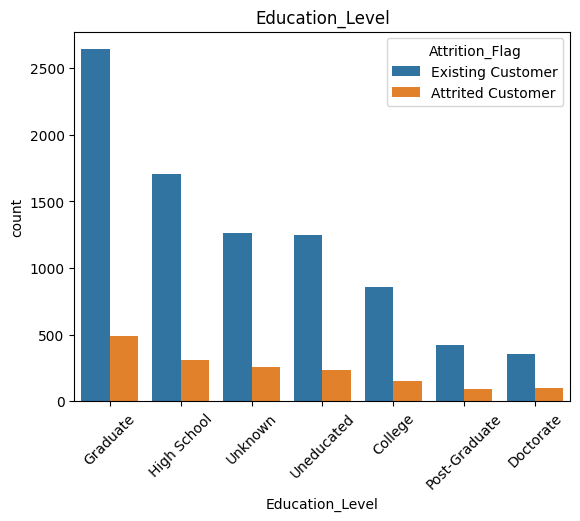

Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                        154                859
Doctorate                       95                356
Graduate                       487               2641
High School                    306               1707
Post-Graduate                   92                424
Uneducated                     237               1250
Unknown                        256               1263
Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                   0.152024           0.847976
Doctorate                 0.210643           0.789357
Graduate                  0.155691           0.844309
High School               0.152012           0.847988
Post-Graduate             0.178295           0.821705
Uneducated                0.159381           0.840619
Unknown                   0.168532           0.831468


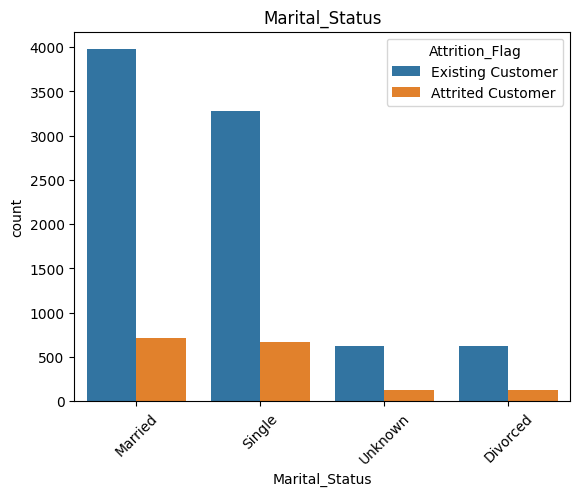

Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                      121                627
Married                       709               3978
Single                        668               3275
Unknown                       129                620
Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                 0.161765           0.838235
Married                  0.151269           0.848731
Single                   0.169414           0.830586
Unknown                  0.172230           0.827770


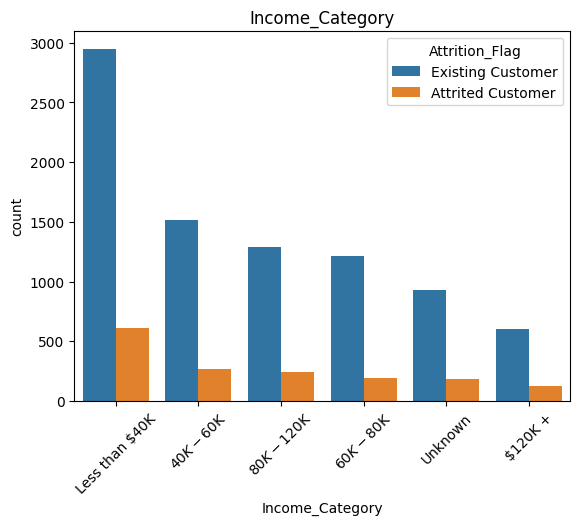

Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                        126                601
$40K - $60K                    271               1519
$60K - $80K                    189               1213
$80K - $120K                   242               1293
Less than $40K                 612               2949
Unknown                        187                925
Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                   0.173315           0.826685
$40K - $60K               0.151397           0.848603
$60K - $80K               0.134807           0.865193
$80K - $120K              0.157655           0.842345
Less than $40K            0.171862           0.828138
Unknown                   0.168165           0.831835


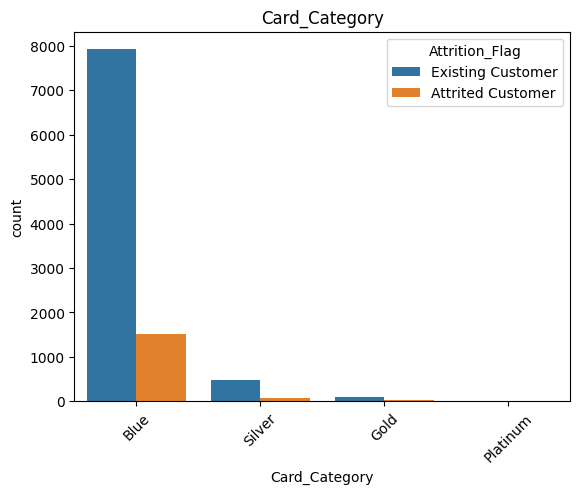

Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                         1519               7917
Gold                           21                 95
Platinum                        5                 15
Silver                         82                473
Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                     0.160979           0.839021
Gold                     0.181034           0.818966
Platinum                 0.250000           0.750000
Silver                   0.147748           0.852252


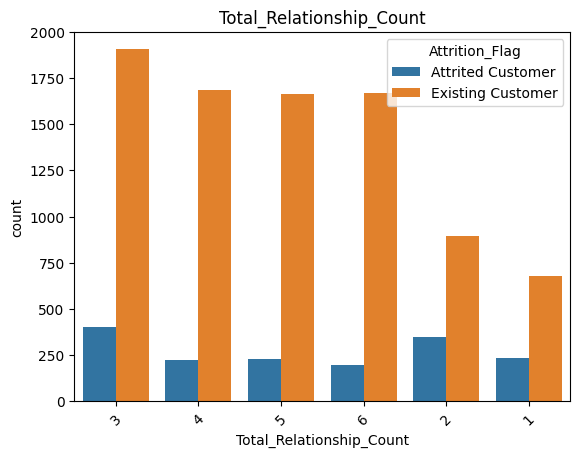

Attrition_Flag            Attrited Customer  Existing Customer
Total_Relationship_Count                                      
1                                       233                677
2                                       346                897
3                                       400               1905
4                                       225               1687
5                                       227               1664
6                                       196               1670
Attrition_Flag            Attrited Customer  Existing Customer
Total_Relationship_Count                                      
1                                  0.256044           0.743956
2                                  0.278359           0.721641
3                                  0.173536           0.826464
4                                  0.117678           0.882322
5                                  0.120042           0.879958
6                                  0.105038           0

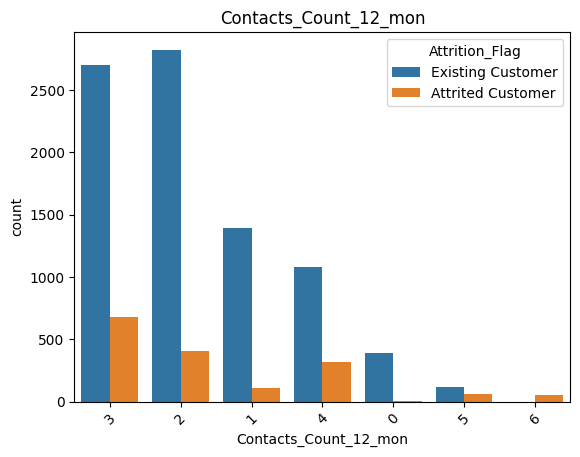

Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                                      7                392
1                                    108               1391
2                                    403               2824
3                                    681               2699
4                                    315               1077
5                                     59                117
6                                     54                  0
Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                               0.017544           0.982456
1                               0.072048           0.927952
2                               0.124884           0.875116
3                               0.201479           0.798521
4                               0.226293           0.773707
5                               0.335227

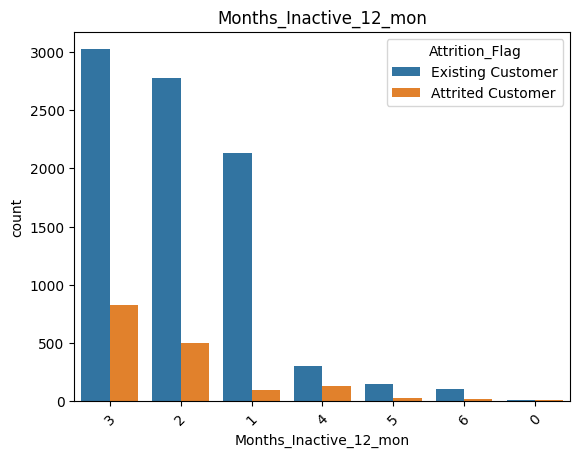

Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
0                                      15                 14
1                                     100               2133
2                                     505               2777
3                                     826               3020
4                                     130                305
5                                      32                146
6                                      19                105
Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
0                                0.517241           0.482759
1                                0.044783           0.955217
2                                0.153870           0.846130
3                                0.214769           0.785231
4                                0.298851           0.701149
5                       

In [165]:
for column in columns:
    # 내림차순으로 정렬된 데이터프레임 생성
    sorted_df = df[column].value_counts(ascending=False).reset_index()
    sorted_df.columns = [column, 'count']
    
    # 내림차순으로 정렬된 데이터프레임을 사용하여 countplot 생성
    sns.countplot(x=column, data=df, order=sorted_df[column], hue='Attrition_Flag')
    plt.xticks(rotation=45)
    plt.title(column)
    plt.show()
    
    # 변수에 따른 이탈 여부를 표로 나타내기
    group_counts = df.groupby([column, 'Attrition_Flag']).size().unstack(fill_value=0)
    print(group_counts)
    # 변수에 따른 이탈 여부 비율을 표로 나타내기
    group_counts_ratio = group_counts.div(group_counts.sum(axis=1), axis=0)
    print(group_counts_ratio)

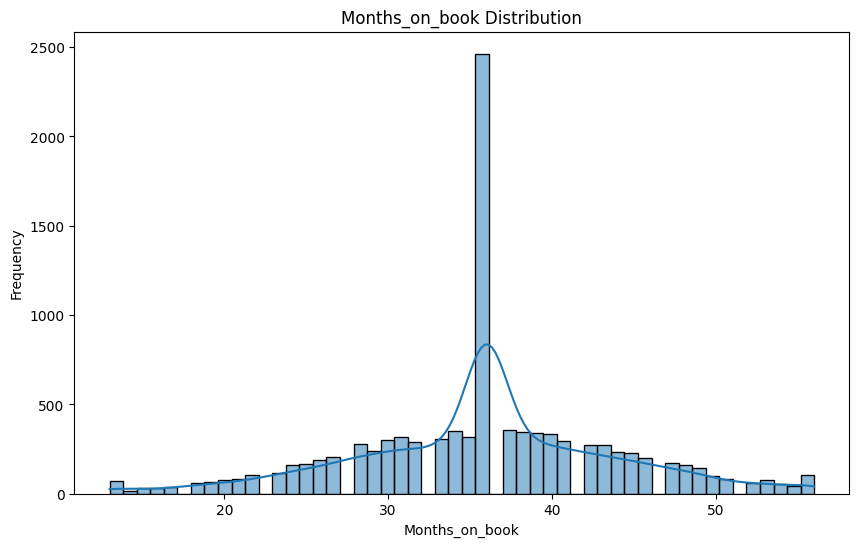

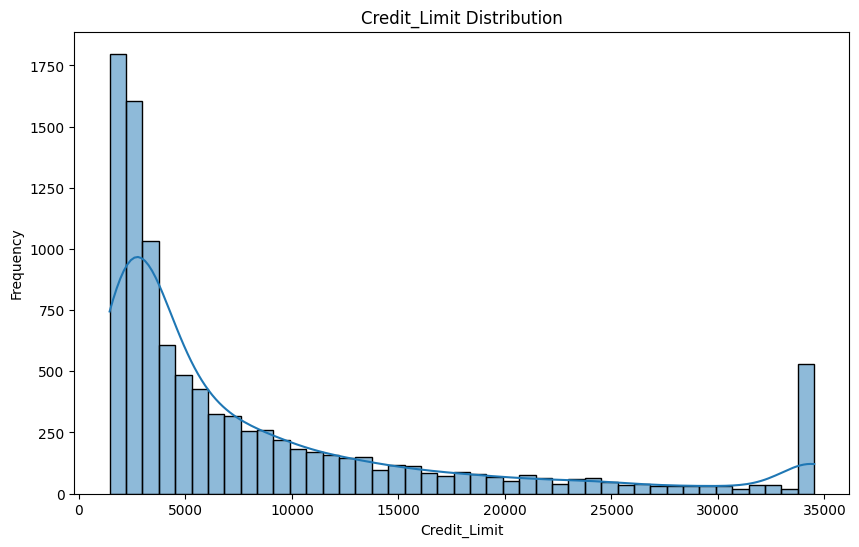

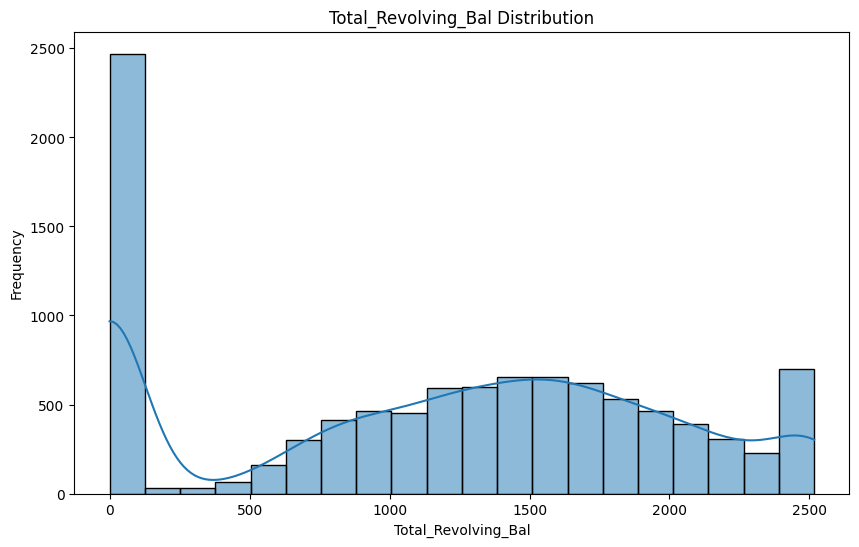

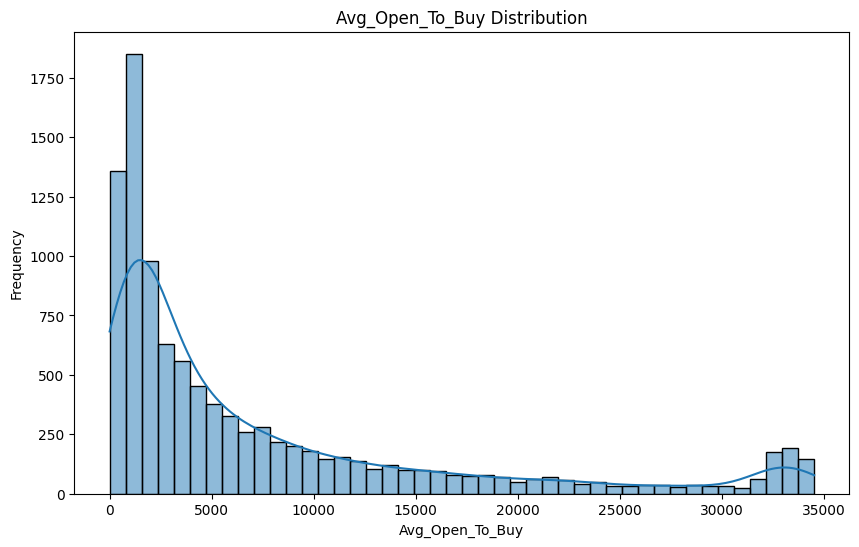

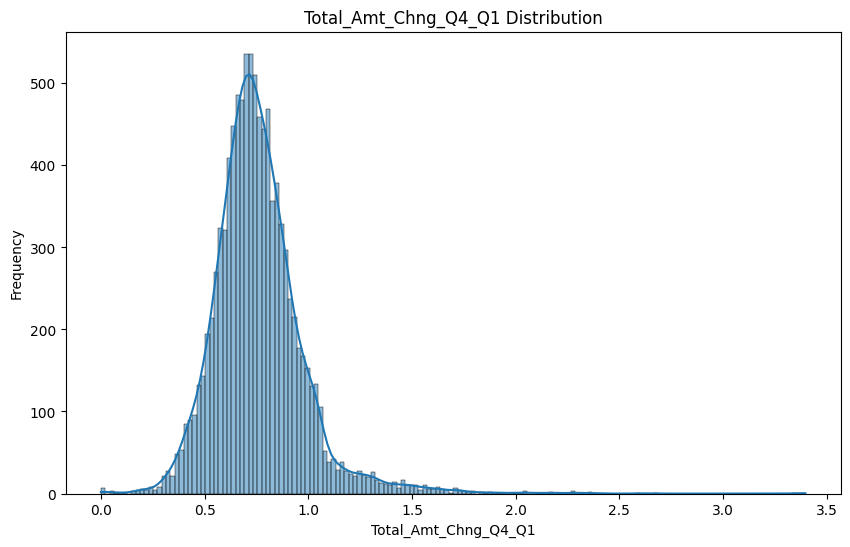

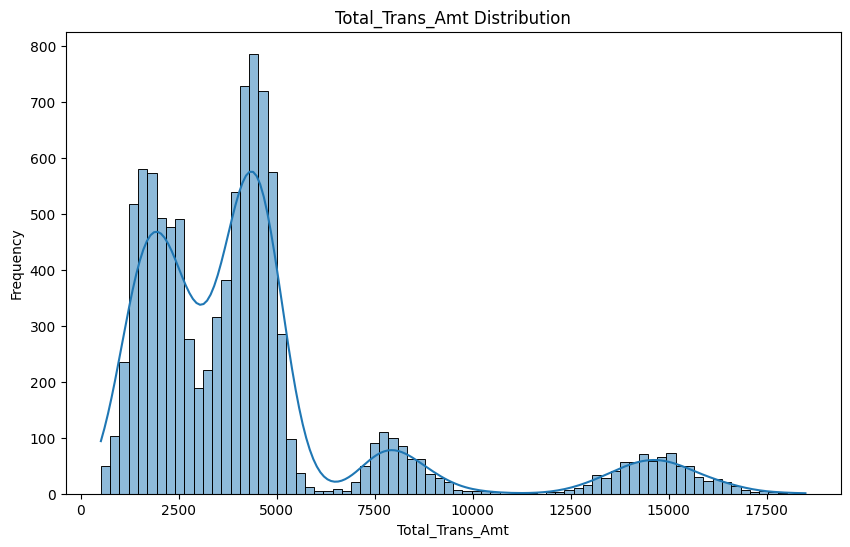

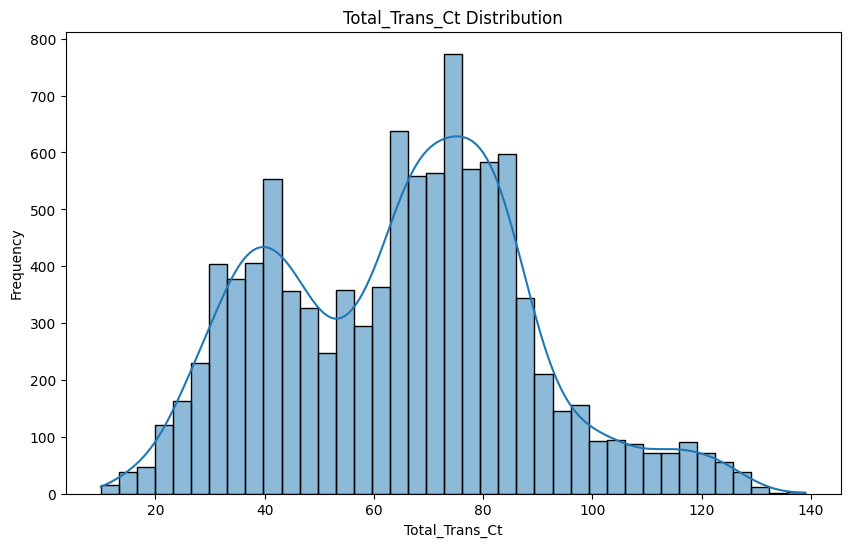

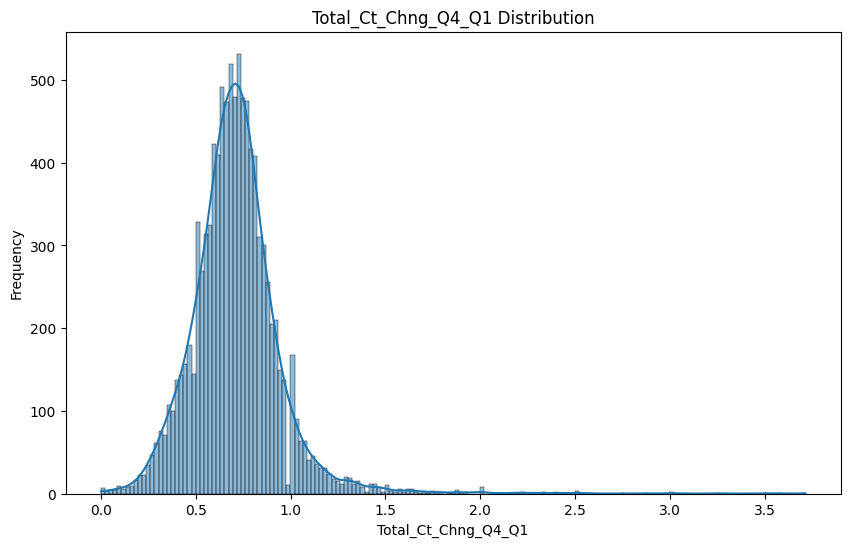

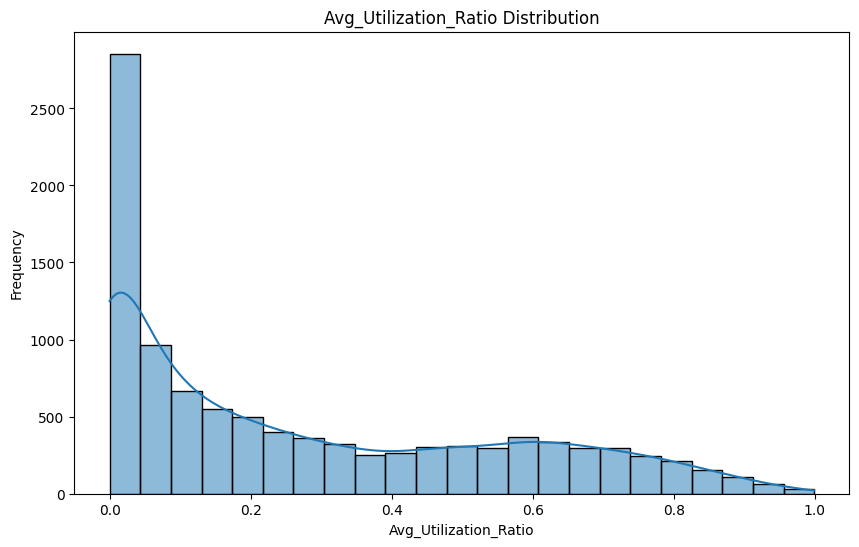

In [166]:
# 반복문을 활용해서 Education_Level, Marital_Status, Income_Category, Card_Category의 분포 확인

columns = ['Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal',
           'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
           'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',]

for column in columns:
    plt.figure(figsize=(10, 6))
    
    # 히스토그램과 KDE를 사용하여 분포 확인
    sns.histplot(df[column], kde=True)
    
    # 그래프 제목과 레이블 설정
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # 그래프 출력
    plt.show()
    

In [167]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [168]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [169]:
# 변수 리스트
variables = [
       'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# 각 변수에 대해 타겟 변수의 고유값 비율과 개수 계산
for var in variables:
    # 각 변수의 고유값에 따른 타겟 변수의 비율 및 개수 계산
    target_distribution = df.groupby(var)['Attrition_Flag'].value_counts(normalize=True).unstack(fill_value=0)
    target_counts = df.groupby(var)['Attrition_Flag'].value_counts().unstack(fill_value=0)
    
    
    
    # 결과 출력
    print(f"{var}에 따른 타겟 변수의 비율 및 개수:")
    print("비율:\n", target_distribution)
    print("개수:\n", target_counts)
    print("\n")

Customer_Age에 따른 타겟 변수의 비율 및 개수:
비율:
 Attrition_Flag  Attrited Customer  Existing Customer
Customer_Age                                        
26                       0.076923           0.923077
27                       0.093750           0.906250
28                       0.034483           0.965517
29                       0.125000           0.875000
30                       0.214286           0.785714
31                       0.142857           0.857143
32                       0.160377           0.839623
33                       0.157480           0.842520
34                       0.130137           0.869863
35                       0.114130           0.885870
36                       0.108597           0.891403
37                       0.142308           0.857692
38                       0.155116           0.844884
39                       0.144144           0.855856
40                       0.177285           0.822715
41                       0.200528           0.799472
42      

total_relationship_count를 보았을 때 1,2인 경우 이탈 고객의 비율이 다른 클래스에 비해 더 높은 것을 알 수 있었다. (> 20%)    
month_inactive_12_mon 컬럼에선 0인 경우 이탈하는 고객의 수가 이탈하지 않는 고객의 수보다 더 많았다. 또한, 3,4인 경우 고객 이탈율이 20%를 넘는 것을 알 수 있었다.    
contacts_count_12_mon 컬럼 경우에는 6으로 높아질수록 이탈율이 증가하였다.   


In [172]:
# 문자열 데이터를 숫자로 변환
label_encoders = {}
string_columns = df.select_dtypes(include=['object']).columns

for column in string_columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le

In [173]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,3,1,2,0,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,1,49,0,5,2,2,4,0,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,1,51,1,3,2,1,3,0,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,1,40,0,4,3,3,4,0,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,1,40,1,3,5,1,2,0,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,0,41,1,2,6,0,1,0,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,0,44,0,1,3,1,4,0,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,0,30,1,2,2,3,1,0,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [174]:
# 두 변수 간의 상관계수 계산

def correlation(df, var1, var2):
  corr = df[[var1, var2]].corr()
  return corr

result = correlation(df, 'Attrition_Flag', 'Marital_Status')
print(result)

                Attrition_Flag  Marital_Status
Attrition_Flag        1.000000       -0.018597
Marital_Status       -0.018597        1.000000


## Drop

In [175]:
# drop할 변수들
drop_columns = ['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
# CLIENTNUM를 제거하는 이유는 고객 식별 정보로 분석에 필요하지 않기 때문이다.

df = df.drop(drop_columns, axis=1)

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int32  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  int32  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int32  
 5   Marital_Status            10127 non-null  int32  
 6   Income_Category           10127 non-null  int32  
 7   Card_Category             10127 non-null  int32  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'    
이 두 변수를 drop하는 이유는 모델의 예측 결과를 나타내기 때문이다.    
나이브 베이즈 분류기는 주어진 입력 데이터에 대해 각 클래스에 속할 확률을 계산한다. 이 확률 값은 해당 데이터 포인트가 특정 클래스에 속할 가능성을 나타내므로 drop해주어야 한다.

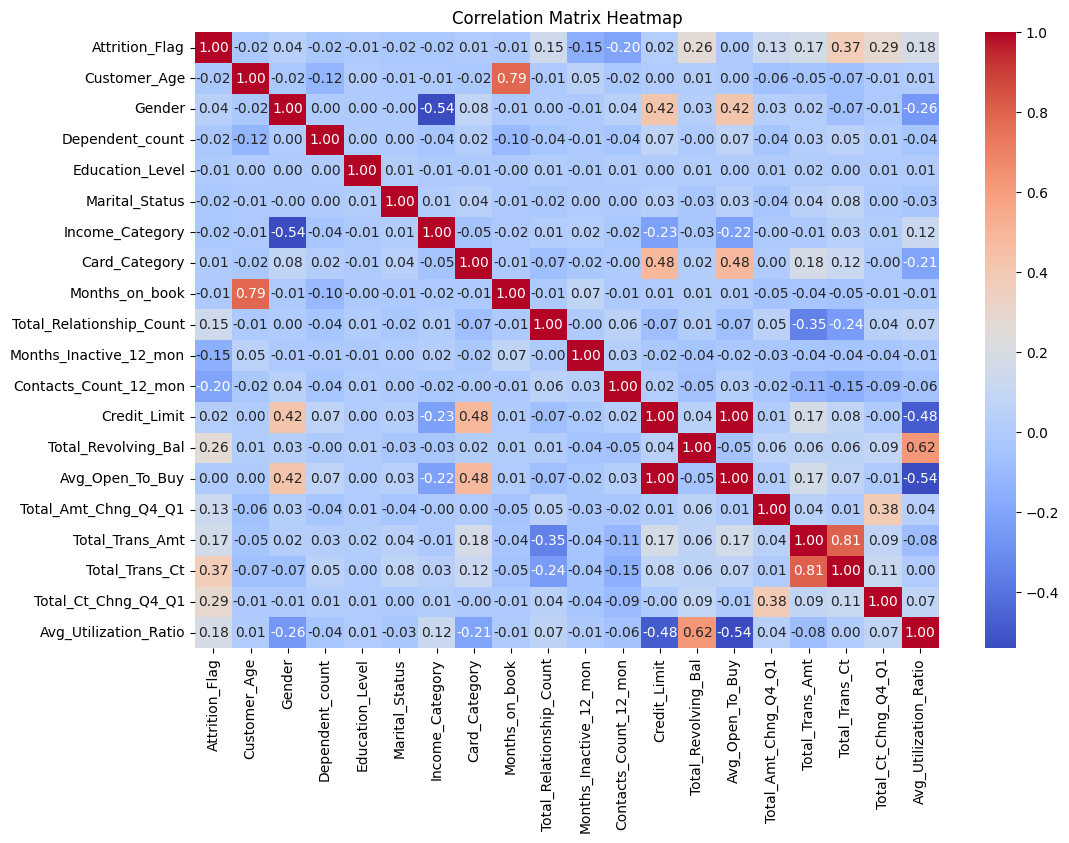

In [177]:
# 상관계수 계산
corr_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Modeling

In [178]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 교차 검증을 통한 모델 성능 평가
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-validation scores: [0.9599013  0.96296296 0.95925926 0.96419753 0.96296296]
Mean cross-validation score: 0.961856802309198
Accuracy: 0.9585389930898321
F1 Score: 0.9755529685681026
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



트리 기반 모델은 각 피처가 분할 기준으로 얼마나 자주 사용되는지를 기반으로 피처 중요도를 계산한다. 따라서 피처 중요도가 높은 피처는 예측을 수행할 때 많은 기여를 했다는 것을 의미하고 이는 분류에 있어서 유의미한 변수라는 것을 의미한다.

                     Feature  Importance
15           Total_Trans_Amt    0.192932
16            Total_Trans_Ct    0.167267
17       Total_Ct_Chng_Q4_Q1    0.113093
12       Total_Revolving_Bal    0.097576
18     Avg_Utilization_Ratio    0.067393
8   Total_Relationship_Count    0.066600
14      Total_Amt_Chng_Q4_Q1    0.062215
11              Credit_Limit    0.034976
0               Customer_Age    0.031849
13           Avg_Open_To_Buy    0.031151
9     Months_Inactive_12_mon    0.026432
10     Contacts_Count_12_mon    0.026223
7             Months_on_book    0.025469
2            Dependent_count    0.013079
3            Education_Level    0.011160
1                     Gender    0.010927
5            Income_Category    0.010869
4             Marital_Status    0.008767
6              Card_Category    0.002021


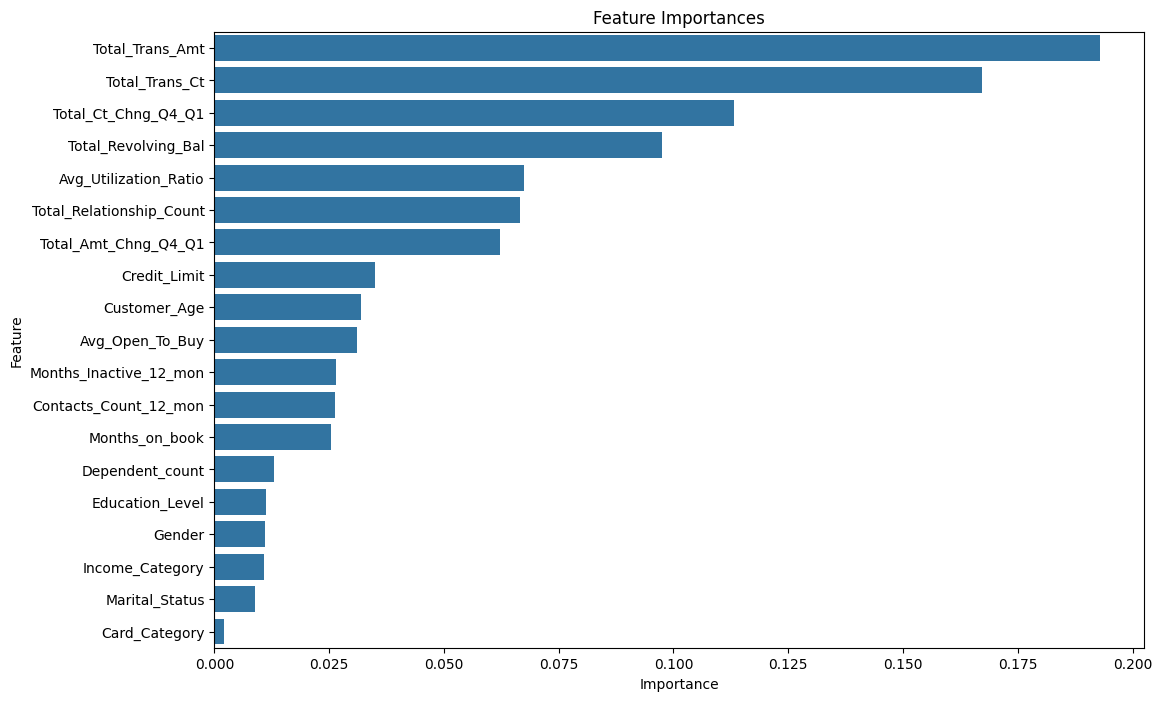

In [179]:
# 피처 중요도 추출
feature_importances = rf_model.feature_importances_

# 피처 중요도를 데이터프레임으로 변환
feature_importances_df = pd.DataFrame({
  'Feature': X.columns,
  'Importance': feature_importances
})

# 중요도 순으로 정렬
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print(feature_importances_df)

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

분석결과 Total_trans_Amt, Total_trans_Ct, Total_Ct_Chng_Q4_Q1 변수가 가장 높은 피처 중요도를 보였다.    

In [180]:
corr_ = correlation(df, 'Total_Trans_Amt', 'Total_Trans_Ct')
print(corr_)

                 Total_Trans_Amt  Total_Trans_Ct
Total_Trans_Amt         1.000000        0.807192
Total_Trans_Ct          0.807192        1.000000


'Total_Trans_Amt', 'Total_Trans_Ct' 이 두 변수는 상관계수가 0.80으로 매우 높기 때문에 다중공선성이 발생할 수 있다. 다중공선성은 회귀 분석에서 두 개 이상의 독립변수가 강한 상관관계를 가질 때 발생하는 문제로 독립변수가 종속변수에 미치는 영향을 명확하게 해석하는데 어려움을 줄 수 있다.

In [182]:
# VIF 계산
X = df.drop(columns=['Attrition_Flag'])  # 종속변수를 제외한 독립변수들
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF 값:")
print(vif_data)


VIF 값:
                     Feature        VIF
0               Customer_Age  77.332902
1                     Gender   3.044755
2            Dependent_count   4.084367
3            Education_Level   3.768079
4             Marital_Status   4.836794
5            Income_Category   6.010507
6              Card_Category   1.450771
7             Months_on_book  56.465206
8   Total_Relationship_Count   7.604975
9     Months_Inactive_12_mon   6.157851
10     Contacts_Count_12_mon   5.649438
11              Credit_Limit        inf
12       Total_Revolving_Bal        inf
13           Avg_Open_To_Buy        inf
14      Total_Amt_Chng_Q4_Q1  14.166335
15           Total_Trans_Amt   8.724527
16            Total_Trans_Ct  24.010254
17       Total_Ct_Chng_Q4_Q1  11.863691
18     Avg_Utilization_Ratio   5.839804


c:\Users\KimDongyoung\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


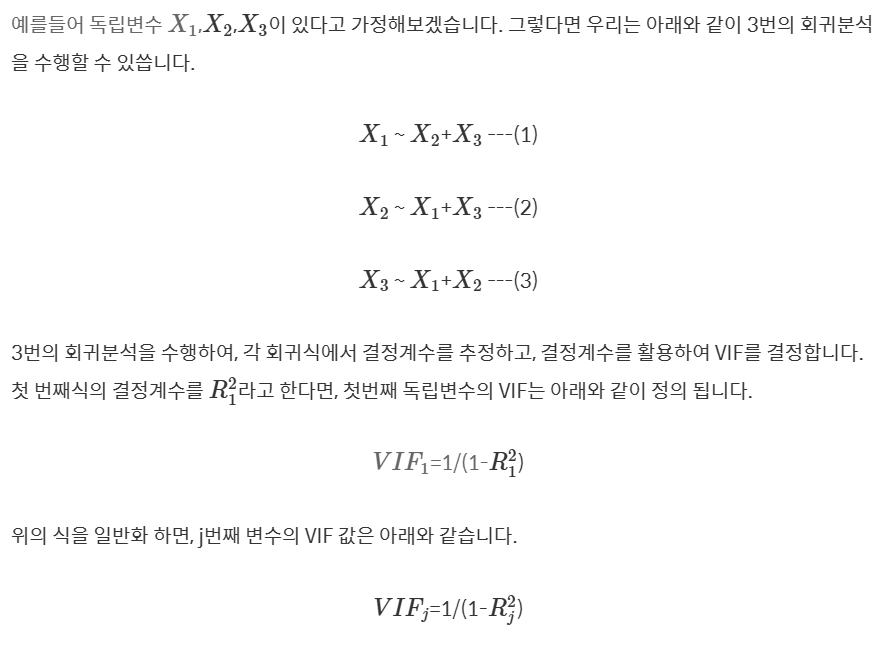

In [191]:
Image("C:/Users/KimDongyoung/Downloads/스크린샷 2024-11-18 225001.png")

다중공선성을 진단할 때 VIF 개념을 많이 활용한다.    
VIF는 독립변수가 여러개 있을 때, 특정 독립변수를 종속변수로하고 나머지 독립변수를 독립변수로 하여 회귀분석을 수행하여 변수간에 관계성을 측정하는 방식이다.    
결정계수(R^2)는 회귀 모델에서 독립변수가 종속변수를 얼마만큼 설명해 주는지를 가리키는 지표이다. 결정계수가 높을수록 독립변수가 종속변수를 많이 설명한다는 뜻인데 이 계수는 독립변수의 수가 증가하면 상승한다. 실제로 종속변수를 잘 설명하지 못하는 변수가 추가되어도 증가하기 때문에 결정계수만 가지고 회귀모델의 유용성을 판단하는 것은 다소 문제가 있다.

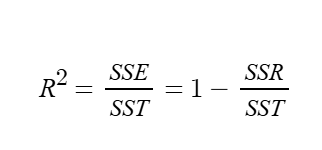

In [192]:
Image("C:/Users/KimDongyoung/Downloads/스크린샷 2024-11-18 230516.png")

       
VIF 값을 확인해본 결과 Customer_Age, Months_on_book가 매우 높게 나온 것을 알 수 있었다. 한편 Credit_Limit, Total_Revolution_Bal, Avg_Open_To_Buy 변수는 무한대의 VIF값을 가진다.    
따라서 위에서 언급한 변수들은 전부 제거를 하고 다시 예측을 진행해본다.

In [183]:
drop_columns = ['Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy']

df = df.drop(drop_columns, axis=1)

In [184]:
# VIF 계산
X = df.drop(columns=['Attrition_Flag'])  # 종속변수를 제외한 독립변수들
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVIF 값:")
print(vif_data)


VIF 값:
                     Feature        VIF
0                     Gender   2.555746
1            Dependent_count   4.036154
2            Education_Level   3.701063
3             Marital_Status   4.746654
4            Income_Category   5.765153
5              Card_Category   1.146180
6   Total_Relationship_Count   7.356370
7     Months_Inactive_12_mon   5.783234
8      Contacts_Count_12_mon   5.425793
9       Total_Amt_Chng_Q4_Q1  13.782135
10           Total_Trans_Amt   8.562844
11            Total_Trans_Ct  23.029291
12       Total_Ct_Chng_Q4_Q1  11.648741
13     Avg_Utilization_Ratio   2.220086


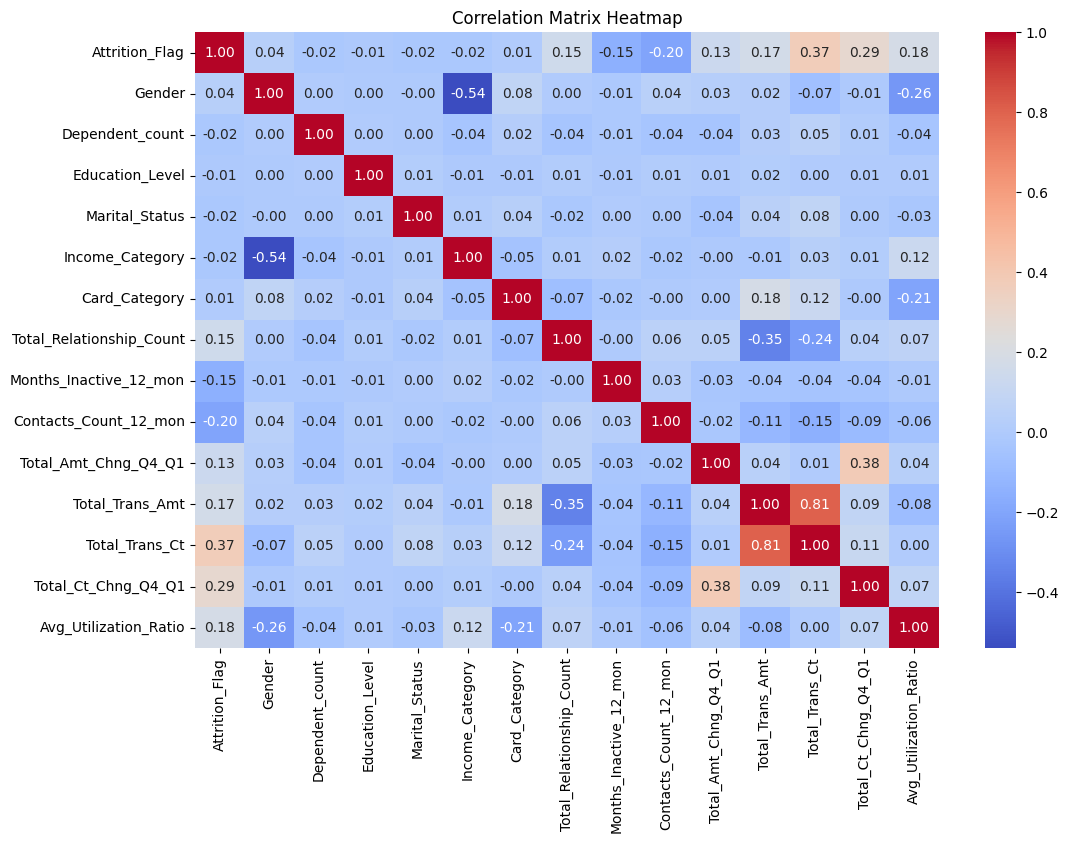

In [185]:
# 상관계수 계산
corr_matrix = df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [186]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 교차 검증을 통한 모델 성능 평가
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 모델 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-validation scores: [0.95619988 0.95679012 0.96111111 0.95987654 0.95802469]
Mean cross-validation score: 0.9584004691510348
Accuracy: 0.9595261599210266
F1 Score: 0.9761766414875074
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.87       327
           1       0.96      0.99      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



VIF를 보고 일부 변수를 제거하고 예측을 진행한 결과 Accuracy, F1 score 모두 올랐다.

                     Feature  Importance
10           Total_Trans_Amt    0.224563
11            Total_Trans_Ct    0.206319
12       Total_Ct_Chng_Q4_Q1    0.125712
13     Avg_Utilization_Ratio    0.111729
9       Total_Amt_Chng_Q4_Q1    0.085372
6   Total_Relationship_Count    0.084217
8      Contacts_Count_12_mon    0.033997
7     Months_Inactive_12_mon    0.032679
1            Dependent_count    0.022071
4            Income_Category    0.019014
2            Education_Level    0.018457
0                     Gender    0.017692
3             Marital_Status    0.014770
5              Card_Category    0.003408


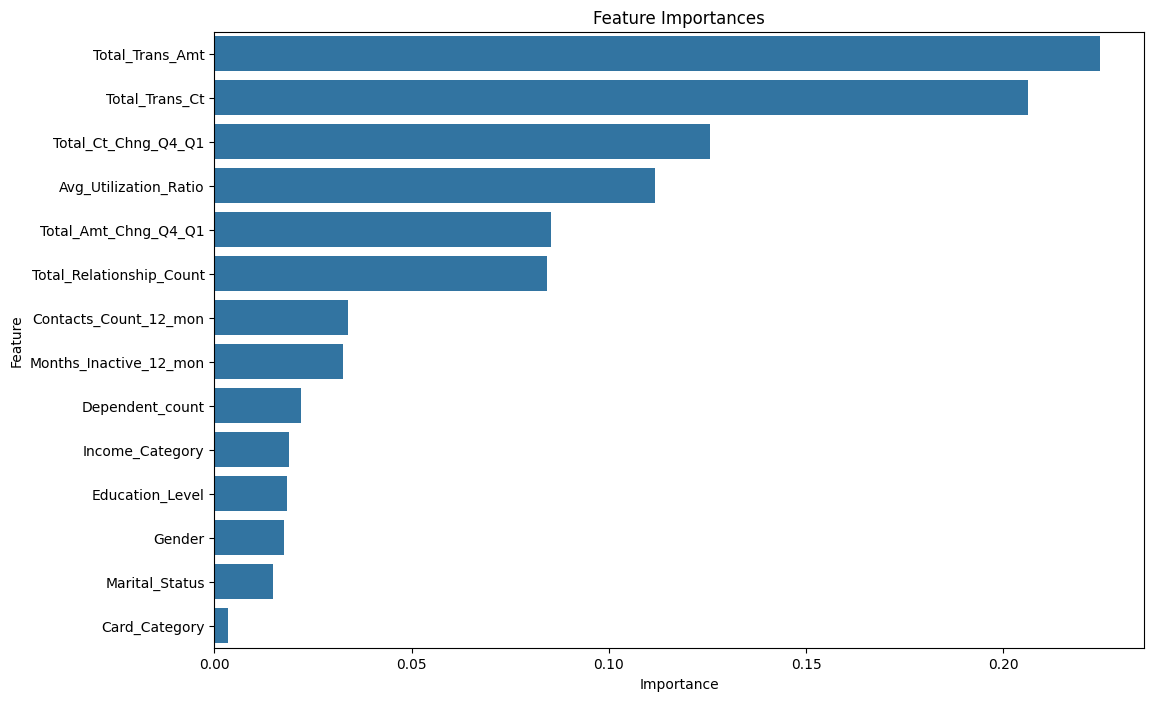

In [187]:
# 피처 중요도 추출
feature_importances = rf_model.feature_importances_

# 피처 중요도를 데이터프레임으로 변환
feature_importances_df = pd.DataFrame({
  'Feature': X.columns,
  'Importance': feature_importances
})

# 중요도 순으로 정렬
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# 피처 중요도 출력
print(feature_importances_df)

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()

## PowerBI 대시보드

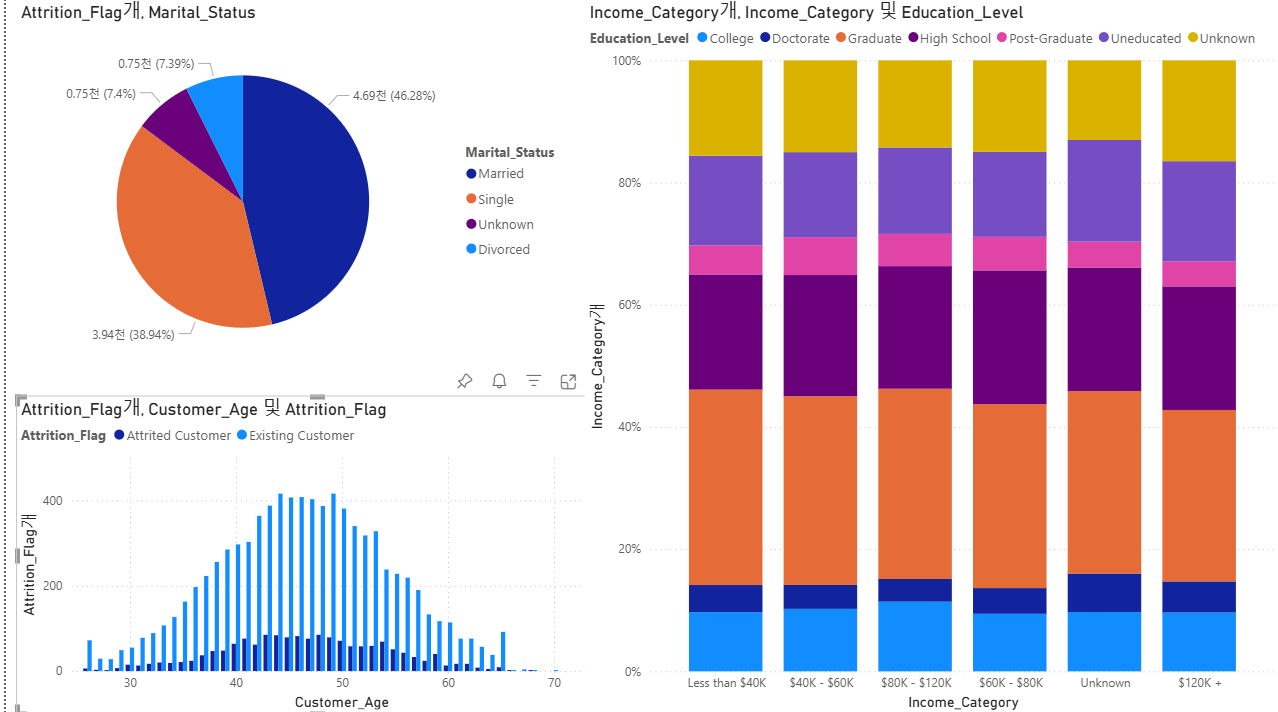

In [193]:
Image("C:/Users/KimDongyoung/Downloads/스크린샷 2024-11-18 232716.png")